


# < Analyzing Club Activity and Performance >

### Step 1 : Importing necessary libraries



In [37]:
# importing the  Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2 : Load the dataset

 Read the CSV file(AppsClub_events_data.csv) into a DataFrame & setting "Session ID" colomn as index colomn 

In [38]:
filename ="AppsClub_events_data.csv"
df = pd.read_csv(filename)

df=df.set_index("Session ID")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 1 to 46
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Event Name       46 non-null     object 
 1   Date             46 non-null     object 
 2   Attendees Count  45 non-null     float64
 3   Rating           43 non-null     float64
 4   Speaker          46 non-null     object 
 5   New Attendees    46 non-null     int64  
 6   Online/Offline   43 non-null     object 
 7   Duration         46 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.2+ KB


#  Step 3: Handling missing values


check for nan values :

In [39]:
#check nan values
print(df.isna().any())
#there is nan values in Rating,AttendeesCount and Online/Offline colomns

Event Name         False
Date               False
Attendees Count     True
Rating              True
Speaker            False
New Attendees      False
Online/Offline      True
Duration           False
dtype: bool


In [40]:

#fill nan in in Online/Offline colomn by most frequent element :
most_frequent_element=df["Online/Offline"].value_counts().idxmax()
df["Online/Offline"]=df["Online/Offline"].fillna(most_frequent_element)

#fill nan in in Rating colomn by average :
df["Rating"]=df["Rating"].fillna(df["Rating"].mean())

#fill nan in AttendeesCount colomn by average :
df["Attendees Count"]=df["Attendees Count"].fillna(df["Attendees Count"].mean())

#check nan values
print(df.isna().any())


Event Name         False
Date               False
Attendees Count    False
Rating             False
Speaker            False
New Attendees      False
Online/Offline     False
Duration           False
dtype: bool


ok , there is not Nan values now

### Step 4: Event Analysis
Calculate the average number of attendees for each event :

In [41]:
df_by_eventname=df.groupby("Event Name")
df_by_eventname["Attendees Count"].mean()

Event Name
AppsChill                      25.000000
Biweekly Contest               20.000000
CP Bootcamp                    57.500000
Conference                    150.000000
Cyber Security Foundations     31.166667
Intro to CS                    50.181818
Intro to Data                  26.250000
Java                           20.000000
Let's Talk                     80.000000
Meet Our Laureat               70.000000
PFA-PFE                       100.000000
Python Basics                  34.879012
Visite Code 212                70.000000
Name: Attendees Count, dtype: float64

Calculating the average rating for each event :

In [42]:
df_by_eventname["Rating"].mean()

Event Name
AppsChill                     4.500000
Biweekly Contest              4.300000
CP Bootcamp                   4.700000
Conference                    5.000000
Cyber Security Foundations    4.358527
Intro to CS                   4.184144
Intro to Data                 3.950000
Java                          4.133333
Let's Talk                    5.000000
Meet Our Laureat              4.900000
PFA-PFE                       4.900000
Python Basics                 4.377778
Visite Code 212               4.000000
Name: Rating, dtype: float64

In [43]:
df.groupby(["Online/Offline"])["Attendees Count"].mean()

Online/Offline
Offline    46.368889
Online     27.727273
Name: Attendees Count, dtype: float64

In [44]:
df.groupby(["Online/Offline"])["Rating"].mean()

Online/Offline
Offline    4.275017
Online     4.486469
Name: Rating, dtype: float64

 ### Step 5: Identify the most and least popular events


 Rank all events by attendance count in descending order :

In [45]:
events_attendance=df.sort_values(["Attendees Count"],ascending=False)
events_attendance

,Event Name,Date,Attendees Count,Rating,Speaker,New Attendees,Online/Offline,Duration
Session ID,,,,,,,,
46,Conference,9-Nov-2024,150.000000,5.000000,Youssef Taguejgalet,50,Offline,240
45,PFA-PFE,5-Nov-2024,100.000000,4.900000,Ilyas Nmili,22,Offline,120
44,Let's Talk,12-Jan-2025,80.000000,5.000000,Ilyas Nmili,35,Online,60
12,Python Basics,8-Oct-2024,80.000000,4.600000,Amine Ait Hamma,20,Offline,90
42,Meet Our Laureat,5-Oct-2024,70.000000,4.900000,Ilyas Nmili,30,Online,148
39,Visite Code 212,21-Oct-2024,70.000000,4.000000,Ilyas Nmili,20,Offline,180
14,Python Basics,15-Oct-2024,65.000000,4.500000,Amine Ait Hamma,15,Offline,90
40,CP Bootcamp,24-Nov-2024,60.000000,4.700000,Amine Ait Hamma,25,Offline,180
41,CP Bootcamp,16-Jan-2025,55.000000,4.700000,Youssef Taguejgalet,20,Offline,180


 Retrieving the top 5 most attended events:

In [46]:
events_attendance.iloc[:5]

,Event Name,Date,Attendees Count,Rating,Speaker,New Attendees,Online/Offline,Duration
Session ID,,,,,,,,
46,Conference,9-Nov-2024,150.0,5.0,Youssef Taguejgalet,50,Offline,240
45,PFA-PFE,5-Nov-2024,100.0,4.9,Ilyas Nmili,22,Offline,120
44,Let's Talk,12-Jan-2025,80.0,5.0,Ilyas Nmili,35,Online,60
12,Python Basics,8-Oct-2024,80.0,4.6,Amine Ait Hamma,20,Offline,90
42,Meet Our Laureat,5-Oct-2024,70.0,4.9,Ilyas Nmili,30,Online,148


Retrieving the bottom 5 least attended events

In [47]:
events_attendance.iloc[-5:]

,Event Name,Date,Attendees Count,Rating,Speaker,New Attendees,Online/Offline,Duration
Session ID,,,,,,,,
27,Java,24-Dec-2024,15.0,3.9,Amine Ait Hamma,2,Online,100
19,Python Basics,2-Nov-2024,14.0,4.6,Amine Ait Hamma,4,Online,120
15,Python Basics,19-Oct-2024,11.0,4.6,Amine Ait Hamma,1,Online,120
13,Python Basics,12-Oct-2024,10.0,4.6,Amine Ait Hamma,5,Online,120
17,Python Basics,26-Oct-2024,7.0,4.6,Amine Ait Hamma,0,Online,120


A bar chart presenting all events by attendance count:

<Axes: xlabel='Session ID'>

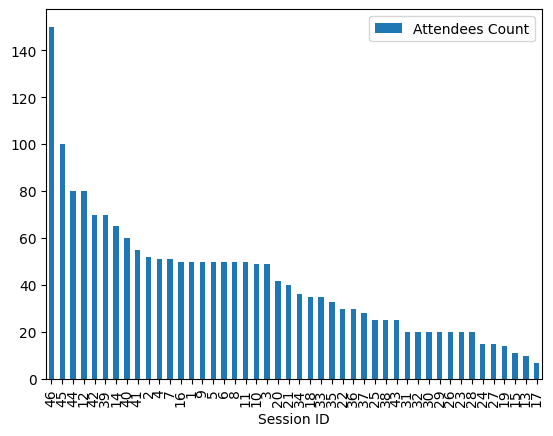

In [48]:
events_attendance.plot(y="Attendees Count" ,kind="bar")

###  Step 6: Analyze event duration vs feedback score


 Plotting a scatter plot representing the relationship between duration and feedback score(Rating):

<Axes: xlabel='Duration', ylabel='Rating'>

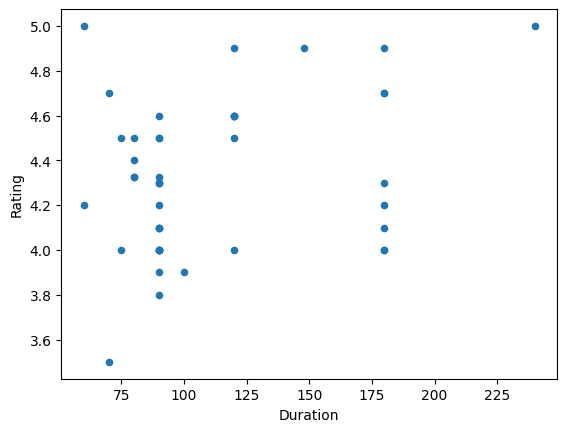

In [49]:
df.plot(kind="scatter" ,x="Duration" ,y="Rating")

###  Step 7: Count events organized by each member

 Count occurrences of each speaker

In [50]:
df["Speaker"].value_counts()

Speaker
Amine Ait Hamma        15
Hasnae Amarmach         9
Ilyas Nmili             8
Broad Sec Cell          6
Nohaila El Idrissi      4
Youssef Taguejgalet     4
Name: count, dtype: int64

###  Step 8: Identify the most active member


the maximum number of events :

In [51]:
df["Speaker"].value_counts().max()

15

the speaker with the highest count :

In [52]:
df["Speaker"].value_counts().idxmax()

'Amine Ait Hamma'

 ### Step 9: Best-rated organizing member


 the average rating per speaker :

In [53]:
df.groupby("Speaker")["Rating"].mean()

Speaker
Amine Ait Hamma        4.373333
Broad Sec Cell         4.358527
Hasnae Amarmach        4.180620
Ilyas Nmili            4.437500
Nohaila El Idrissi     3.950000
Youssef Taguejgalet    4.575000
Name: Rating, dtype: float64

finding the highest rating :

In [54]:
df.groupby("Speaker")["Rating"].mean().max()

4.575

Best-rated organizing member(additional question) :

In [55]:
df.groupby("Speaker")["Rating"].mean().idxmax()

'Youssef Taguejgalet'

 ### Step 10 :Visualizing new attendee trend overtime


 Sort the dataset by date :

In [56]:
#the type of the colomn "Date" is Object , we want to convert it into datetime , to have the data sorted well by date 
df["Date"] = pd.to_datetime(df["Date"])
#sort by date
df=df.sort_values("Date")
df


,Event Name,Date,Attendees Count,Rating,Speaker,New Attendees,Online/Offline,Duration
Session ID,,,,,,,,
42,Meet Our Laureat,2024-10-05,70.000000,4.900000,Ilyas Nmili,30,Online,148
1,Intro to CS,2024-10-07,50.000000,4.200000,Ilyas Nmili,10,Offline,60
12,Python Basics,2024-10-08,80.000000,4.600000,Amine Ait Hamma,20,Offline,90
13,Python Basics,2024-10-12,10.000000,4.600000,Amine Ait Hamma,5,Online,120
28,Biweekly Contest,2024-10-12,20.000000,4.000000,Ilyas Nmili,5,Offline,180
2,Intro to CS,2024-10-14,52.000000,4.500000,Hasnae Amarmach,8,Offline,75
14,Python Basics,2024-10-15,65.000000,4.500000,Amine Ait Hamma,15,Offline,90
15,Python Basics,2024-10-19,11.000000,4.600000,Amine Ait Hamma,1,Online,120
39,Visite Code 212,2024-10-21,70.000000,4.000000,Ilyas Nmili,20,Offline,180


A plot to show how new attendees changed overtime:

<Axes: xlabel='Date'>

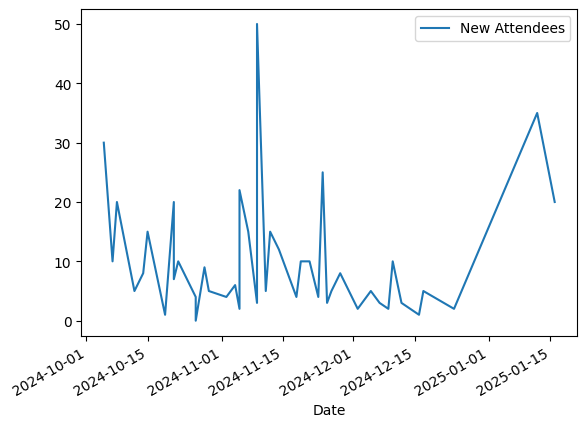

In [57]:
df.plot(x="Date" ,y="New Attendees")

# ---------------------------------------------------------------------------------------------------------------------

# Mr Achraf Boulhem 